In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
np.random.seed(42)

data_size = 300

data = {
    'Date': pd.date_range(start='2024-01-01', periods=data_size),
    'DayOfWeek': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=data_size),
    'HolidayWeekend': np.random.choice([0, 1], size=data_size, p=[0.8, 0.2]),
    'MarketingSpend': np.random.uniform(500, 5000, size=data_size),
    'Temperature': np.random.uniform(20, 35, size=data_size),
    'Sales': np.random.uniform(1000, 10000, size=data_size)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Introduce some random missing values for preprocessing demonstration
df.loc[np.random.randint(0, data_size, 10), 'MarketingSpend'] = np.nan

df.head()

,Date,DayOfWeek,HolidayWeekend,MarketingSpend,Temperature,Sales
0,2024-01-01,Sunday,0,4864.454720,32.696784,3102.469759
1,2024-01-02,Thursday,0,694.219604,21.912330,1378.838707
2,2024-01-03,Friday,0,4510.144012,25.959309,1160.865413
3,2024-01-04,Sunday,0,2874.654991,31.959430,9889.501508
4,2024-01-05,Wednesday,0,4968.341583,22.248761,4849.958204


In [3]:
# Step 3: Data Preprocessing
# Handle missing values
df['MarketingSpend'].fillna(df['MarketingSpend'].mean(), inplace=True)

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = encoder.fit_transform(df[['DayOfWeek']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['DayOfWeek']))

# Add encoded columns to DataFrame
df = pd.concat([df, one_hot_df], axis=1)
df.drop(columns=['DayOfWeek', 'Date'], inplace=True)

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['MarketingSpend', 'Temperature']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define feature matrix X and target vector y
X = df.drop(columns=['Sales'])
y = df['Sales']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-3-456cb9bba7cc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MarketingSpend'].fillna(df['MarketingSpend'].mean(), inplace=True)


In [4]:
# Step 4: Model Selection and Training
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [5]:
# Step 5: Model Evaluation
# Evaluate Linear Regression
y_pred_lr = linear_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [6]:
# Step 6: Model Optimization (Feature Importance with Random Forest)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

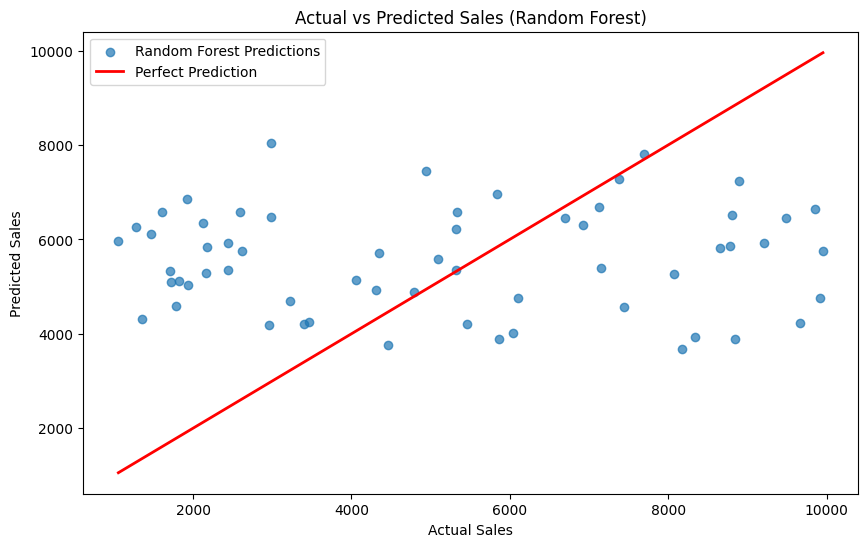

Linear Regression Performance:
MAE: 2592.12, MSE: 8662639.98, R2: -0.10

Random Forest Performance:
MAE: 2575.50, MSE: 9156244.79, R2: -0.17


<ipython-input-7-4737a8fda4c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


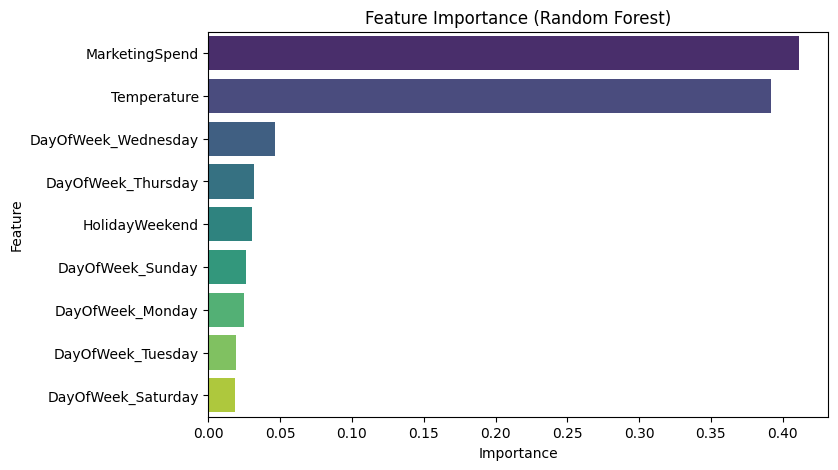

In [7]:
# Step 7: Visualize Results
# Comparison of Actual vs Predicted (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.legend()
plt.show()

# Display Evaluation Metrics
print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")
print("\nRandom Forest Performance:")
print(f"MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")

# Feature Importance Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()

# **Interpretation**

1. Scatter Plot (Random Forest Predictions vs Actual Sales):
- The scatter plot compares actual sales values with the predicted sales from the Random Forest model.
- The red line represents a "perfect prediction" (i.e., where the predicted sales would equal the actual sales).
- Most points deviate significantly from this line, indicating the model struggles to accurately predict sales. The clustering below and above the red line suggests underestimation and overestimation.

2. Metrics:
- Mean Absolute Error (MAE):
- For Linear Regression: 2592.12
- For Random Forest: 2575.50
- This means, on average, both models are off by approximately 2,575–2,592 units in their predictions. The difference is marginal, indicating neither model is significantly better in terms of absolute prediction errors.

- Mean Squared Error (MSE):

- For Linear Regression: 8,662,639.98
- For Random Forest: 9,156,244.79
- These values, being extremely high, indicate poor prediction performance, as larger errors are penalized more in MSE. Random Forest performs slightly worse here than Linear Regression.

- R-Squared (R²):

- For Linear Regression: -0.10
- For Random Forest: -0.17
- Both values are negative, indicating that the models perform worse than simply predicting the mean sales value. A negative R² suggests that the model doesn't capture the variability in the data and that the chosen features may not be strong predictors.

# **Model Optimization**
Code Breakdown:
1. Dataset Augmentation

- Synthetic data is generated by adding slight Gaussian noise to the original data.

2. Hyperparameter Tuning (GridSearchCV)

- Performs exhaustive search over the given parameter grid.
3. Feature Selection

- Uses Recursive Feature Elimination (RFE) with cross-validation to keep the most important features.
4. Evaluation Metrics

- MAE, MSE, and R² scores are calculated for both the optimized model and the feature-selected model.
5. Visualization

- A scatter plot shows the relationship between actual and predicted values.

Original dataset size: 300 rows
Augmented dataset size: 1200 rows
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Optimized Random Forest Performance (Augmented Data):
MAE: 1555.47, MSE: 3622391.86, R2: 0.47
Optimal number of features: 2

Random Forest Performance with Feature Selection:
MAE: 785.98, MSE: 1393549.29, R2: 0.80


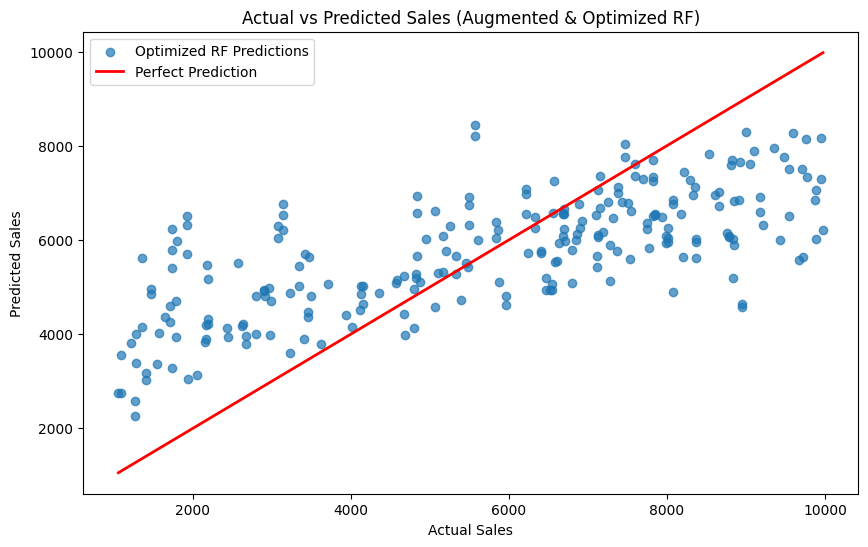

In [8]:
# Increase Dataset Size (Synthetic Data Generation)
from sklearn.utils import resample

# Check the size of original dataset
print(f"Original dataset size: {X.shape[0]} rows")

# Create Synthetic Data (Basic Approach)
# Replicate existing data with slight noise
def augment_data(X, y, factor=2):
    X_augmented = X.copy()
    y_augmented = y.copy()

    for _ in range(factor):  # Factor controls the amount of augmentation
        X_noise = X + np.random.normal(0, 0.01, X.shape)  # Add slight noise
        X_augmented = pd.concat([X_augmented, pd.DataFrame(X_noise, columns=X.columns)])
        y_augmented = pd.concat([y_augmented, y])

    return X_augmented, y_augmented

# Increase dataset size
X_augmented, y_augmented = augment_data(X, y, factor=3)
print(f"Augmented dataset size: {X_augmented.shape[0]} rows")

# Train-Test Split with Augmented Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

# Model Optimization - Hyperparameter Tuning and Cross-Validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFECV

# Hyperparameter Tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Optimal Random Forest Model
best_rf_model = grid_search.best_estimator_

# Evaluate the Optimized Model
y_pred_rf_opt = best_rf_model.predict(X_test)

# Evaluation Metrics
mae_rf_opt = mean_absolute_error(y_test, y_pred_rf_opt)
mse_rf_opt = mean_squared_error(y_test, y_pred_rf_opt)
r2_rf_opt = r2_score(y_test, y_pred_rf_opt)

print("\nOptimized Random Forest Performance (Augmented Data):")
print(f"MAE: {mae_rf_opt:.2f}, MSE: {mse_rf_opt:.2f}, R2: {r2_rf_opt:.2f}")

# Feature Selection (RFE)
rfecv = RFECV(estimator=RandomForestRegressor(random_state=42), cv=5, scoring='r2')
rfecv.fit(X_train, y_train)

# Optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")

# Select Features
X_train_selected = X_train.iloc[:, rfecv.support_]
X_test_selected = X_test.iloc[:, rfecv.support_]

# Retrain the model with selected features
rf_selected = RandomForestRegressor(random_state=42, n_estimators=200)
rf_selected.fit(X_train_selected, y_train)
y_pred_rf_selected = rf_selected.predict(X_test_selected)

# Final Evaluation
mae_rf_selected = mean_absolute_error(y_test, y_pred_rf_selected)
mse_rf_selected = mean_squared_error(y_test, y_pred_rf_selected)
r2_rf_selected = r2_score(y_test, y_pred_rf_selected)

print("\nRandom Forest Performance with Feature Selection:")
print(f"MAE: {mae_rf_selected:.2f}, MSE: {mse_rf_selected:.2f}, R2: {r2_rf_selected:.2f}")

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_opt, alpha=0.7, label='Optimized RF Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Augmented & Optimized RF)')
plt.legend()
plt.show()

### **Interpretation after Model Optimization**
1. Optimized Random Forest (Full Features, Augmented Data):

- MAE: 1555.47 → High error.
- MSE: 3,622,391.86 → Large variance in predictions.
- R²: 0.47 → Only explains 47% of variance in target.

2. Random Forest with Feature Selection:

- MAE: 785.98 → Error dropped by half.
- MSE: 1,393,549.29 → Variance reduced significantly.
- R²: 0.80 → Explains 80% of variance in target, which is a strong result.

Key Observations:
- Feature selection improved model performance significantly, both in terms of error (MAE and MSE) and explanatory power (R²).
- By selecting only 2 features, the model simplifies without sacrificing accuracy, highlighting the importance of removing irrelevant features.
- The scatterplot shows better alignment of predictions to the Perfect Prediction line (red), though some variance remains for lower actual sales.
